# Black Jack (Double decks black jack)
### Would make sure if paople can make money at Casino. If yes, want to know how much money I can make in a year.

#### What I did is that
1, Made black jack sumilator which is exact same rules as Parq Casino where is in down town in Vancouver  by my own using python to collect datas to make dataframe.<br>
2, Made sure if counting cards really works to win or not.<br>
3, Figured out how much money should be buyin and goal in a day.<br>
4, Sumilated 30times(days) and one year. In this case one year is 360 days.<br>

In [14]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (15.0, 12.0)
import mpl_toolkits.mplot3d as m3d
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


## First of all, need to explain what is counting cards.
To be honest, Casinos dont allow players to count cards. So you must act that you dont counting cards.<br>

### What is card counting?<br>
* Count 2 < cards <= 6 as +1<br>
* Count 7<= cards <= 9 as 0<br>
* Count 10 <= cards <= A as -1<br>

##### For instance,
Player has 10 and 9, dealer has 10 and 10.<br>
The counting is going to be -3 which means player has more disadvantage to win than the counting is 0 and we call it IRC stands for Initial Running Count .<br>


### What is true count?
Made 3d plot about true count.<br>
True Count = IRC/Remaining Decks

##### For examples,
When the IRC is 3 and remaining decks is 3/2(78cards), True Count is 2.


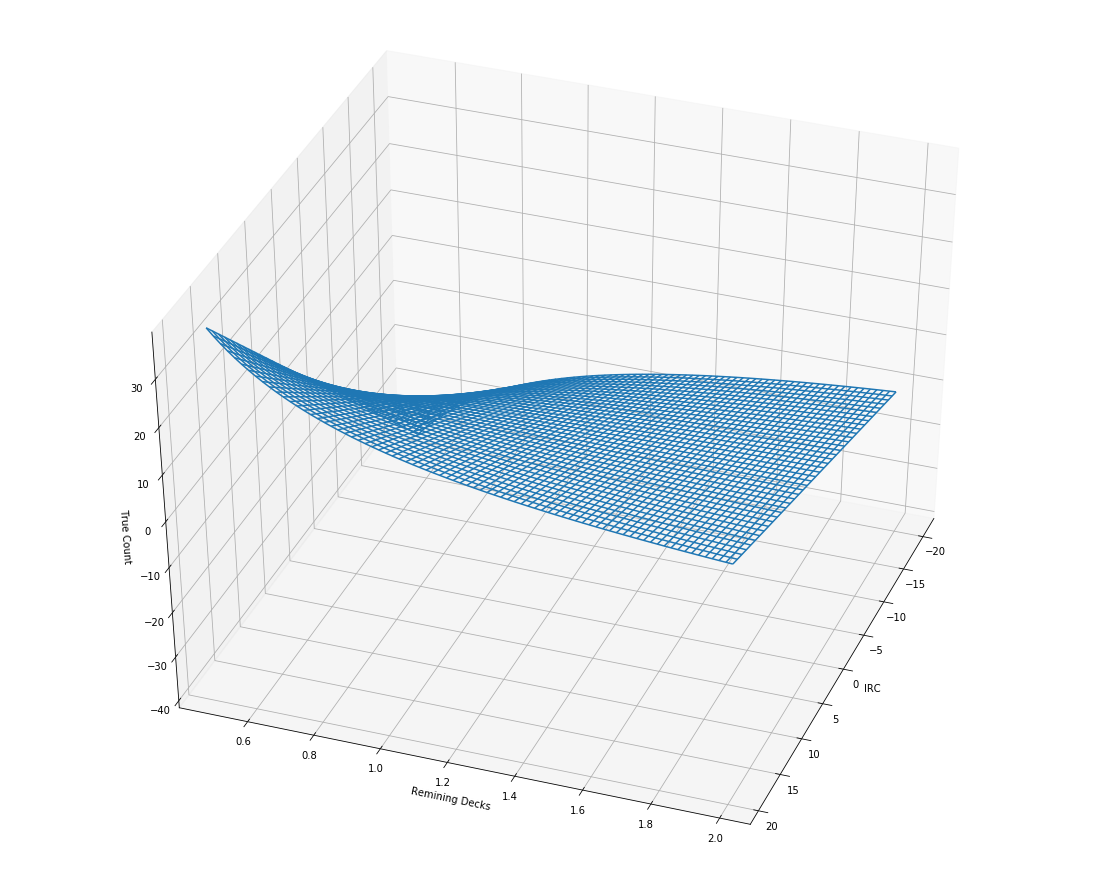

In [16]:
fig3d = m3d.Axes3D(plt.figure())
x = np.arange(-20,20,1)
y = np.arange(26/52,2,1/52)
xx,yy = np.meshgrid(x,y)
Z = xx/yy
fig3d.plot_wireframe(xx,yy,Z,rstride=1,cstride=1);
fig3d.view_init(40,20)
fig3d.set_xlabel("IRC");
fig3d.set_ylabel("Remining Decks");
fig3d.set_zlabel("True Count");

### First of all, made 5 data frames which have 5000 hands datas as following rule

* Betting System: True count >= 5.5 bet 10 units, True count >= 1.5 bet math.floor(True count * 2 - 1), Others bet 1 unit (1 unit 25bucks) 

In [54]:
df1 = pd.read_csv("/Users/koheisuzuki/Desktop/Bob_Suzuki Brainstation_Final_Project/DDBJ_TrueCount/DDBJ1.csv")
df1.head(100)

,Player First Hand,Player Action,Player Hand,Player Sum,Dealer Show Card,Dealer Hand,Dealer Sum,Result,Total Winning,Running Count,True Count
0,"[8, 7]",H,"[8, 7, 8]",23,7,[7.],7,L,-25.0,0,0.0
1,"[8, 9]",S,"[8, 9]",17,5,[ 5. 10. 2.],17,P,-25.0,2,1.0
2,"[10, 10]",S,"[10, 10]",20,111,[111. 10.],21,L,-50.0,3,1.6
3,"[10, 10]",S,"[10, 10]",20,10,[10. 10.],20,P,-50.0,-1,-0.6
4,"[10, 5]",H,"[10, 5, 10]",25,111,[111.],11,L,-75.0,-5,-3.0
5,"[8, 4]",H,"[8, 4, 10]",22,111,[111.],11,L,-100.0,-7,-4.4
6,"[7, 10]",S,"[7, 10]",17,6,[6. 8. 8.],22,W,-75.0,-8,-5.3
7,"[7, 10]",S,"[7, 10]",17,10,[10. 10.],20,L,-100.0,-7,-4.9
8,"[3, 8]",D,"[3, 8, 2]",13,6,[ 6. 10. 10.],26,W,-50.0,-9,-6.7
9,"[9, 9]",SP,"[array([ 9, 10]), array([9, 7])]","[19, 16]",6,[ 6. 10. 5.],21,"['SL', 'SL']",-100.0,-8,-6.5


In [18]:
df2 = pd.read_csv("/Users/koheisuzuki/Desktop/Bob_Suzuki Brainstation_Final_Project/DDBJ_TrueCount/DDBJ2.csv")
df2.head()

,Player First Hand,Player Action,Player Hand,Player Sum,Dealer Show Card,Dealer Hand,Dealer Sum,Result,Total Winning,Running Count,True Count
0,"[111, 10]",PBJ,"[111, 10]",21,10,[10. 10.],20,W,37.5,0,0.0
1,"[3, 5]",H,"[3, 5, 10]",18,7,[7. 2. 5. 3.],17,W,62.5,-4,-2.1
2,"[111, 4]",D,"[111, 4, 2]",17,5,[ 5. 10. 7.],22,W,112.5,1,0.6
3,"[3, 10]",S,"[3, 10]",13,2,[ 2. 9. 4. 10.],25,W,162.5,3,1.8
4,"[4, 5]",D,"[4, 5, 8]",17,3,[ 3. 111. 6.],20,L,-37.5,4,2.6


In [19]:
df3 = pd.read_csv("/Users/koheisuzuki/Desktop/Bob_Suzuki Brainstation_Final_Project/DDBJ_TrueCount/DDBJ3.csv")
df3.head()

,Player First Hand,Player Action,Player Hand,Player Sum,Dealer Show Card,Dealer Hand,Dealer Sum,Result,Total Winning,Running Count,True Count
0,"[7, 9]",S,"[7, 9]",16,3,[3. 5. 9.],17,L,-25.0,0,0.0
1,"[4, 6]",H,"[4, 6, 10]",20,10,[ 10. 111.],21,L,-50.0,3,1.6
2,"[10, 111]",PBJ,"[10, 111]",21,8,[ 8. 10.],18,W,-12.5,2,1.1
3,"[9, 10]",S,"[9, 10]",19,10,[10. 5. 10.],25,W,12.5,-1,-0.6
4,"[10, 10]",S,"[10, 10]",20,4,[4. 7. 7.],18,W,37.5,-3,-1.8


In [20]:
df4 = pd.read_csv("/Users/koheisuzuki/Desktop/Bob_Suzuki Brainstation_Final_Project/DDBJ_TrueCount/DDBJ4.csv")
df4.head()

,Player First Hand,Player Action,Player Hand,Player Sum,Dealer Show Card,Dealer Hand,Dealer Sum,Result,Total Winning,Running Count,True Count
0,"[8, 9]",S,"[8, 9]",17,10,[10. 5. 6.],21,L,-25.0,0,0.0
1,"[4, 111]",H,"[4, 111, 2]",17,3,[ 3. 10. 10.],23,W,0.0,1,0.5
2,"[10, 9]",S,"[10, 9]",19,2,[ 2. 111. 111. 2. 111.],17,W,25.0,1,0.6
3,"[7, 3]",H,"[7, 3, 8]",18,10,[10. 10.],20,L,0.0,-1,-0.6
4,"[8, 4]",H,"[8, 4, 6]",18,10,[10. 6. 4.],20,L,-25.0,-1,-0.6


In [21]:
df5 = pd.read_csv("/Users/koheisuzuki/Desktop/Bob_Suzuki Brainstation_Final_Project/DDBJ_TrueCount/DDBJ5.csv")
df5.head()

,Player First Hand,Player Action,Player Hand,Player Sum,Dealer Show Card,Dealer Hand,Dealer Sum,Result,Total Winning,Running Count,True Count
0,"[3, 10]",H,"[3, 10, 2, 10]",25,7,[7.],7,L,-25.0,0,0.0
1,"[2, 10]",H,"[2, 10, 2, 10]",24,10,[10.],10,L,-50.0,1,0.5
2,"[4, 10]",H,"[4, 10, 6]",20,7,[ 7. 111.],18,W,-25.0,0,0.0
3,"[2, 6]",H,"[2, 6, 3, 8]",19,7,[7. 4. 9.],20,L,-50.0,1,0.6
4,"[9, 8]",S,"[9, 8]",17,5,[ 5. 6. 5. 10.],26,W,-25.0,6,3.8


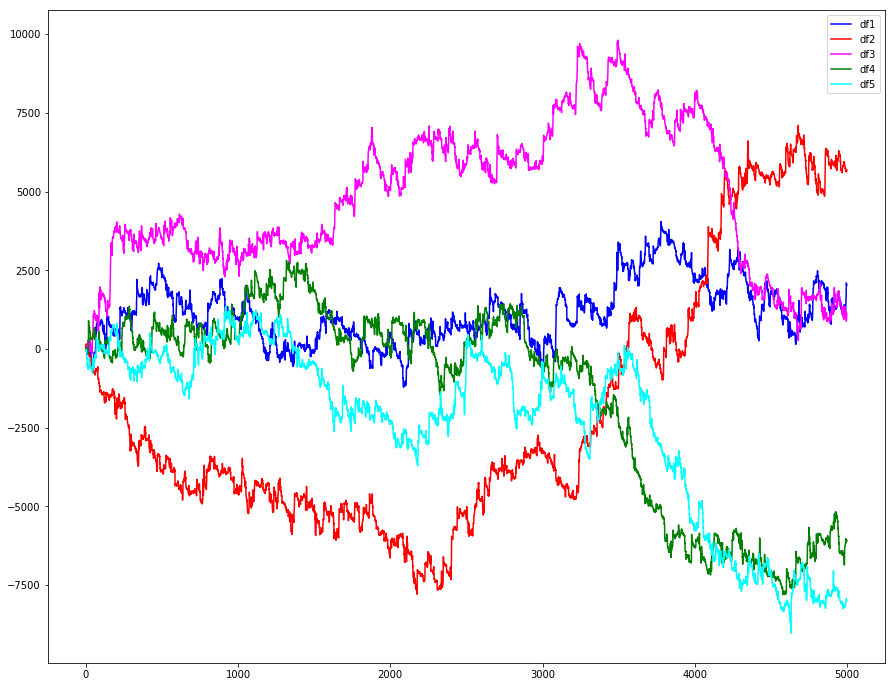

In [50]:
plt.plot(df1.index,df1["Total Winning"], color = "blue");
plt.plot(df2.index,df2["Total Winning"], color = "red");
plt.plot(df3.index,df3["Total Winning"], color = "magenta");
plt.plot(df4.index,df4["Total Winning"], color = "green");
plt.plot(df5.index,df5["Total Winning"], color = "cyan");
plt.legend(("df1","df2","df3","df4","df5"));

Right now, not sure that it's possible to make money or not.

From now, investigated that winning percentage related to true count.<br>
So what I did is that run 20000 times for each true count which is from -0.5 to 6.5 step by 0.5.

In [23]:
dftcs = pd.read_csv("/Users/koheisuzuki/Desktop/Bob_Suzuki Brainstation_Final_Project/DDBJTCs/DDBJTCs.csv", index_col = 0)
dftcs.head()

,Player First Hand,Player Action,Player Hand,Player Sum,Dealer Show Card,Dealer Hand,Dealer Sum,Result,Total Winning,Running Count,True Count
0,"[10, 5]",H,"[10, 5, 2]",17,7,[ 7. 10.],17,P,0.0,-1,-0.5
1,"[7, 5]",S,"[7, 5]",12,4,[ 4. 111. 10. 2.],17,L,-25.0,-1,-0.5
2,"[9, 10]",S,"[9, 10]",19,8,[8. 7. 6.],21,L,-50.0,-1,-0.5
3,"[10, 3]",S,"[10, 3]",13,5,[ 5. 10. 10.],25,W,-25.0,-1,-0.5
4,"[111, 6]",H,"[111, 6, 111]",18,2,[ 2. 10. 3. 4.],19,L,-50.0,-1,-0.5


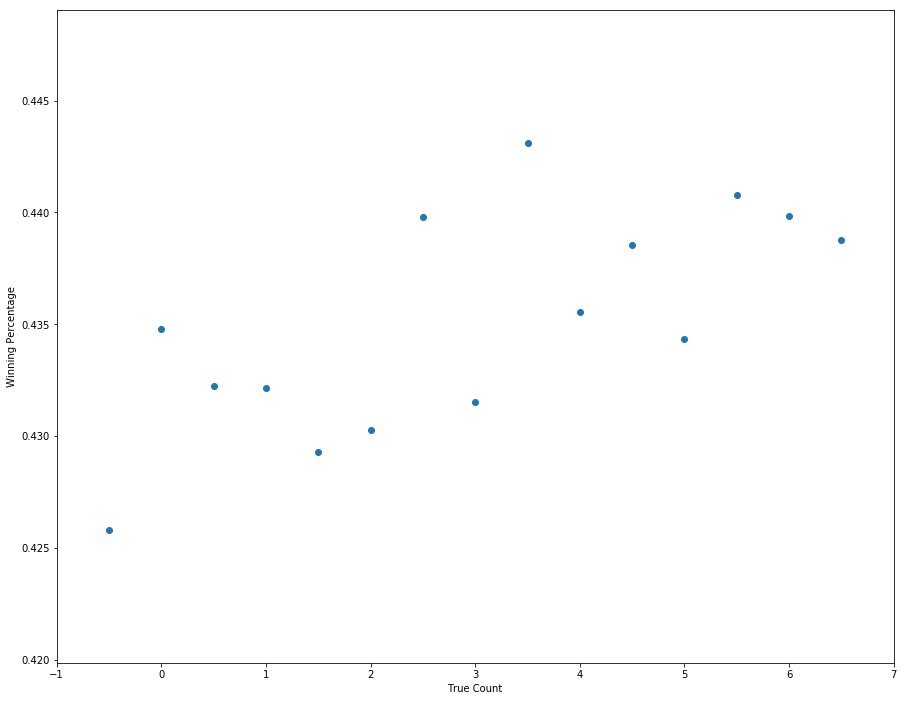

In [53]:
true_count = np.arange(-0.5,7,0.5)
win_rate = list(map(lambda i: len(dftcs[(dftcs["True Count"] == i) & (dftcs["Result"] == "W")])/20000,true_count))
scatter(true_count,win_rate);
plt.xlim(-1,7);
plt.ylabel("Winning Percentage");
plt.xlabel("True Count");

In [27]:
np.corrcoef(true_count,win_rate)

array([[1.        , 0.69393464],
       [0.69393464, 1.        ]])

In [28]:
slope_w, intercept_w, rvalue_w, pvalue_w, stderr_w = stats.linregress(true_count,win_rate)

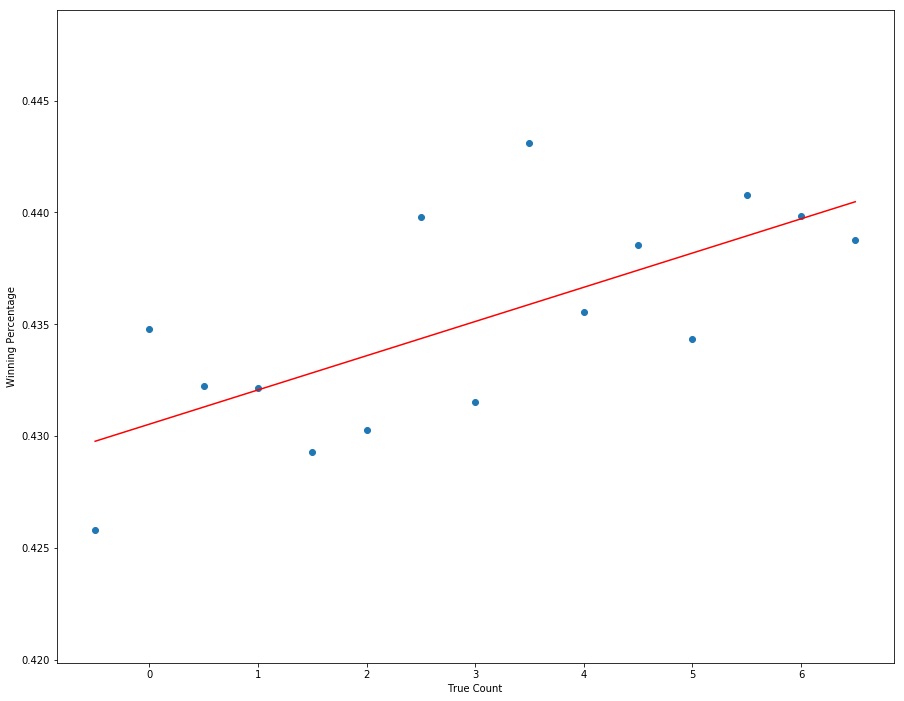

In [29]:
scatter(true_count,win_rate);
plt.plot(true_count,intercept_w + slope_w*true_count, color = "red");
plt.ylabel("Winning Percentage");
plt.xlabel("True Count");

Now we can say there is relashionship between winning percentage and card counting.

Let's see the other relationships.

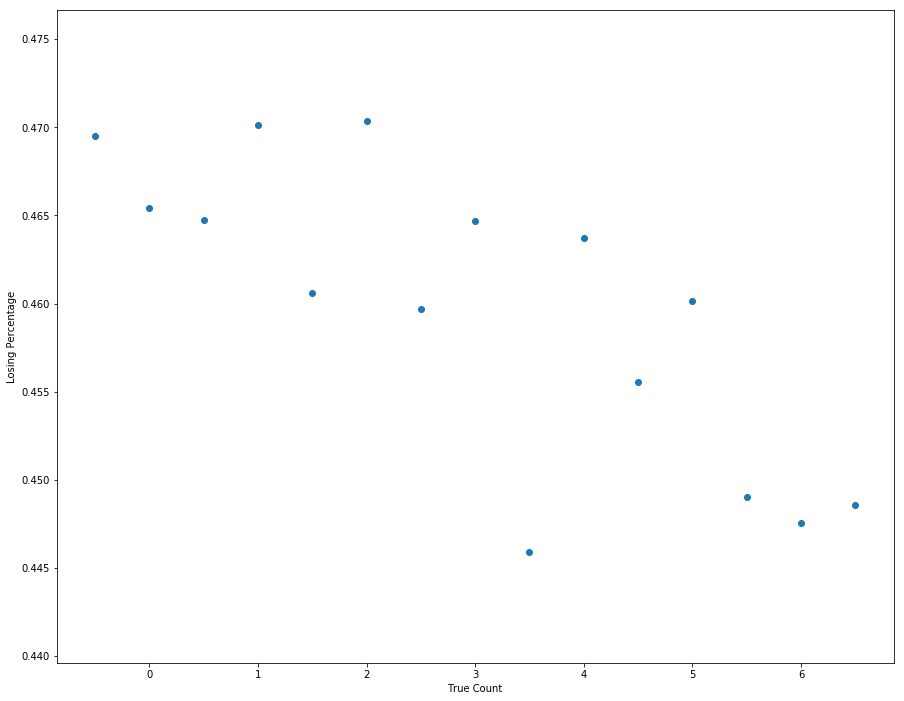

In [31]:
true_count = np.arange(-0.5,7,0.5)
lose_rate = list(map(lambda i: len(dftcs[(dftcs["True Count"] == i) & (dftcs["Result"] == "L")])/20000,true_count))
scatter(true_count,lose_rate);
plt.ylabel("Losing Percentage");
plt.xlabel("True Count");

In [32]:
np.corrcoef(true_count,lose_rate)

array([[ 1.        , -0.77821736],
       [-0.77821736,  1.        ]])

In [33]:
slope_l, intercept_l, rvalue_l, pvalue_l, stderr_l = stats.linregress(true_count,lose_rate)

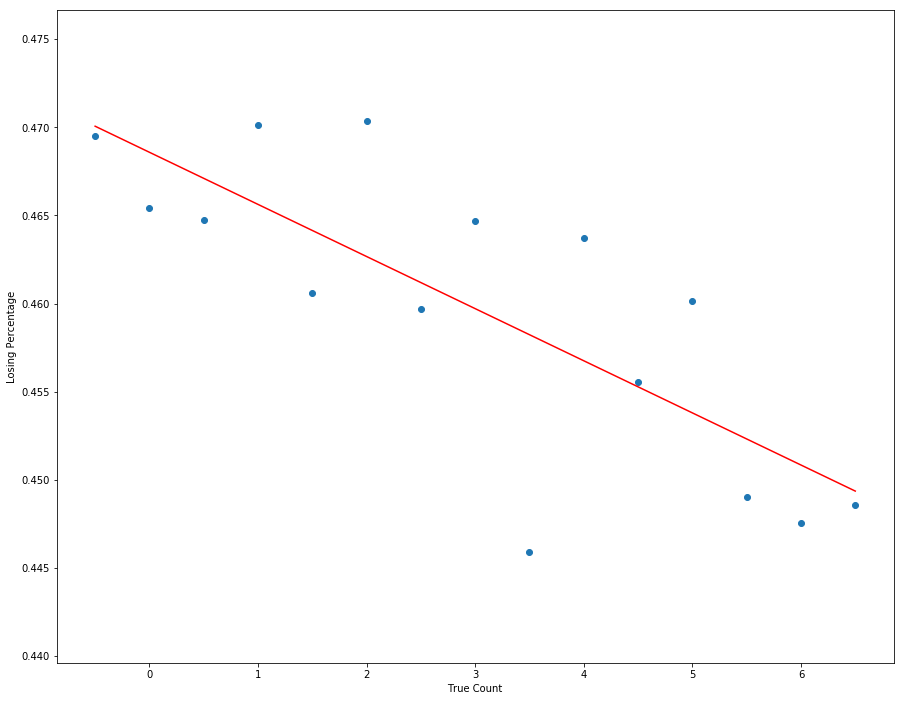

In [34]:
scatter(true_count,lose_rate);
plt.plot(true_count,intercept_l + slope_l*true_count, color = "red");
plt.ylabel("Losing Percentage");
plt.xlabel("True Count");

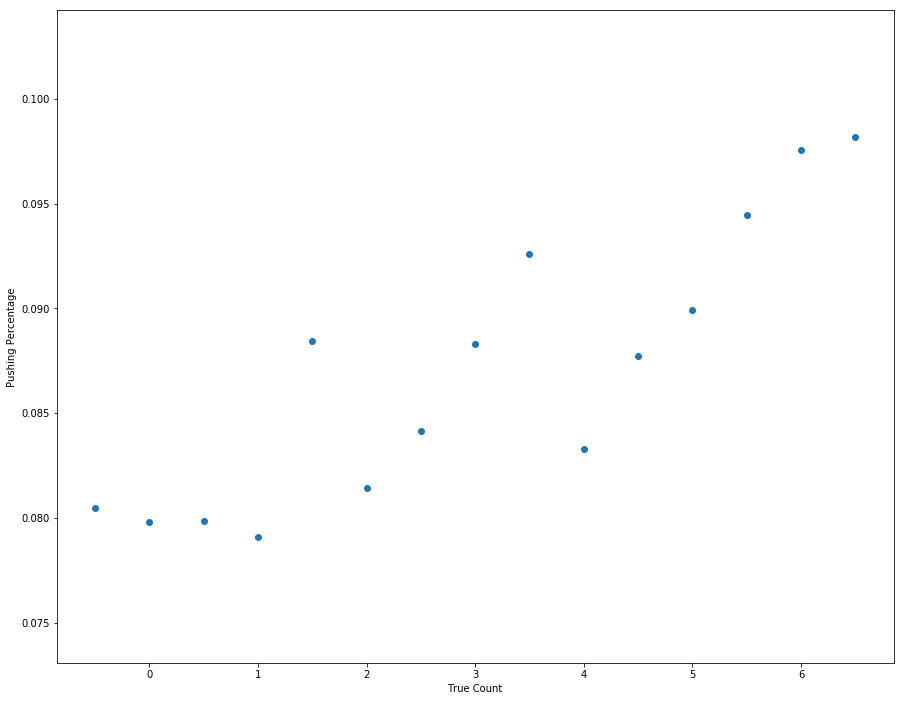

In [35]:
true_count = np.arange(-0.5,7,0.5)
push_rate = list(map(lambda i: len(dftcs[(dftcs["True Count"] == i) & (dftcs["Result"] == "P")])/20000,true_count))
scatter(true_count,push_rate);
plt.ylabel("Pushing Percentage");
plt.xlabel("True Count");

In [36]:
np.corrcoef(true_count,push_rate)

array([[1.       , 0.8729908],
       [0.8729908, 1.       ]])

In [37]:
slope_p, intercept_p, rvalue_p, pvalue_p, stderr_p = stats.linregress(true_count,push_rate)

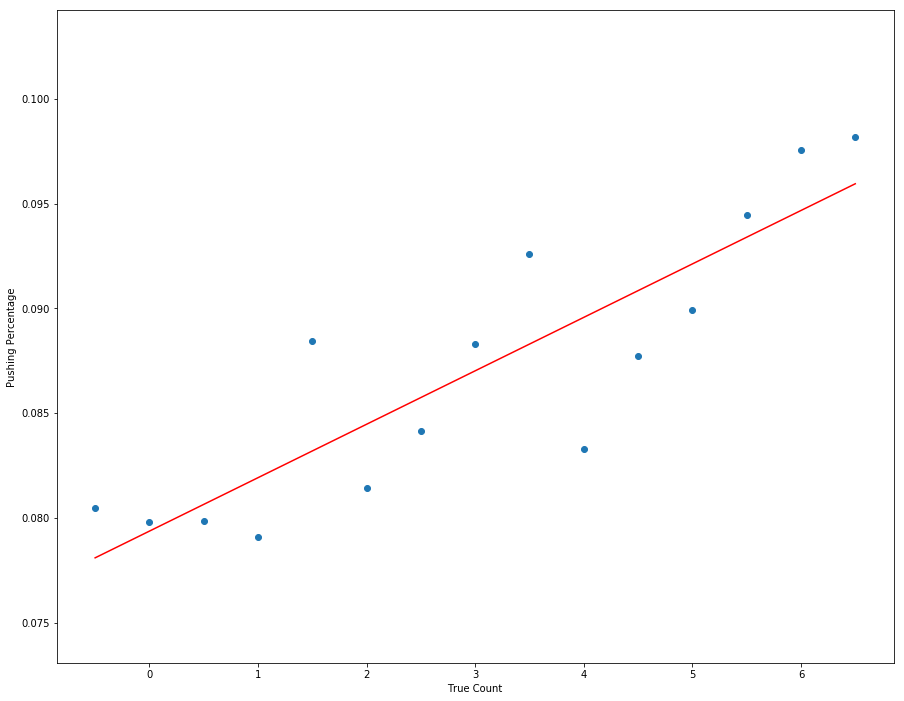

In [38]:
scatter(true_count,push_rate);
plt.plot(true_count,intercept_p + slope_p*true_count, color = "red");
plt.ylabel("Pushing Percentage");
plt.xlabel("True Count");

More true counting increase,more losing percentage decrease.

And we can say same thing as winning percentage to the pushing percentage.

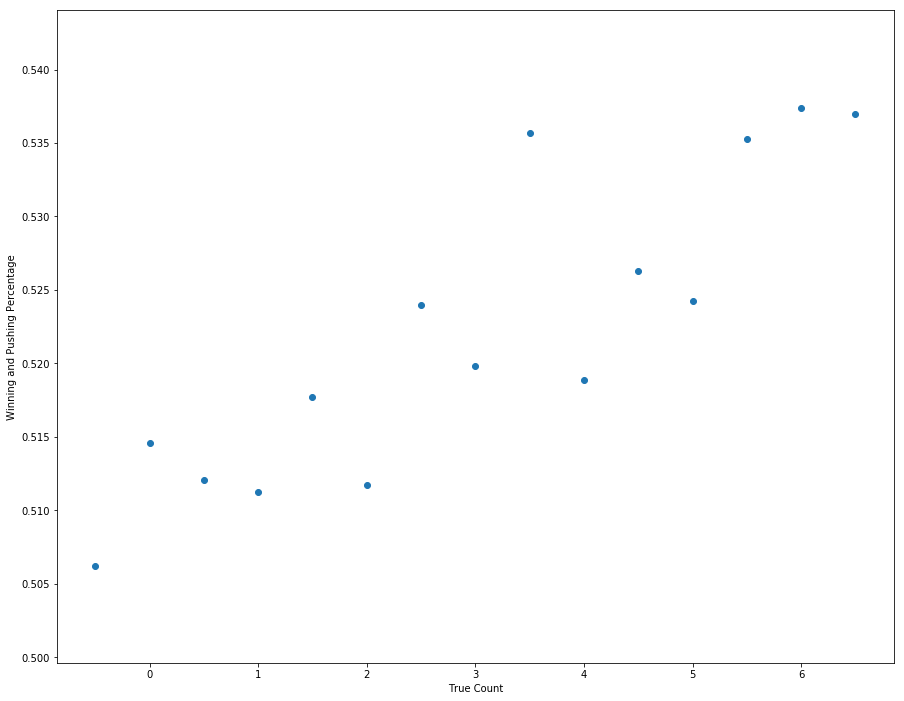

In [39]:
true_count = np.arange(-0.5,7,0.5)
win_and_push_rate = list(map(lambda i: len(dftcs[(dftcs["True Count"] == i) & ((dftcs["Result"] == "W") | (dftcs["Result"] == "P"))])/20000,true_count))
scatter(true_count,win_and_push_rate);
plt.ylabel("Winning and Pushing Percentage");
plt.xlabel("True Count");

Then check the relationship between winning and pushing percentage and losing percentage

In [40]:
slope_wp, intercept_wp, rvalue_wp, pvalue_wp, stderr_wp = stats.linregress(true_count,win_and_push_rate)

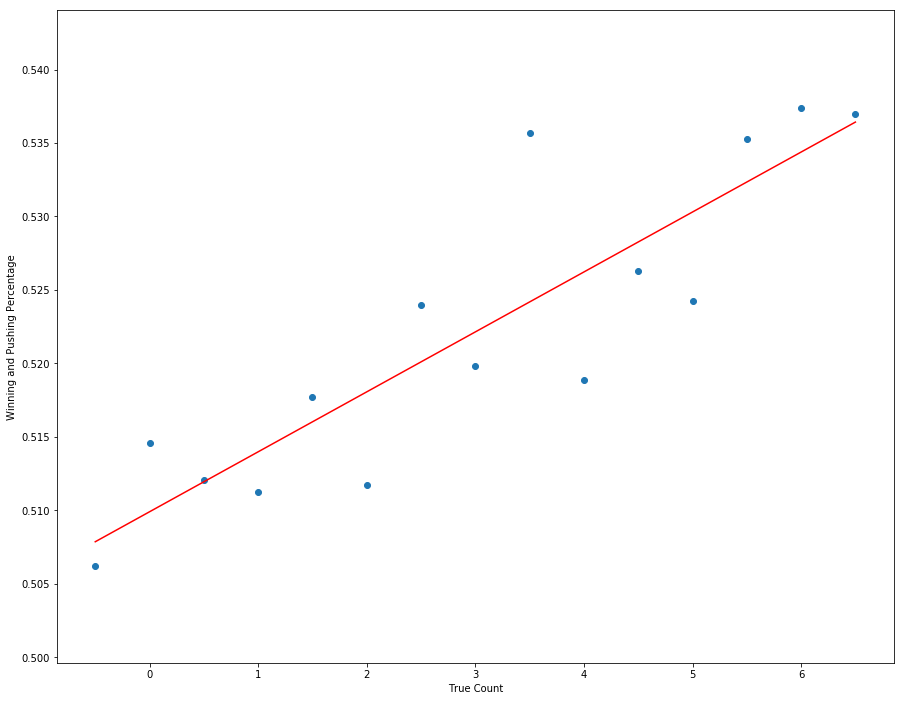

In [41]:
scatter(true_count,win_and_push_rate);
plt.plot(true_count,intercept_wp + slope_wp*true_count, color = "red");
plt.ylabel("Winning and Pushing Percentage");
plt.xlabel("True Count");

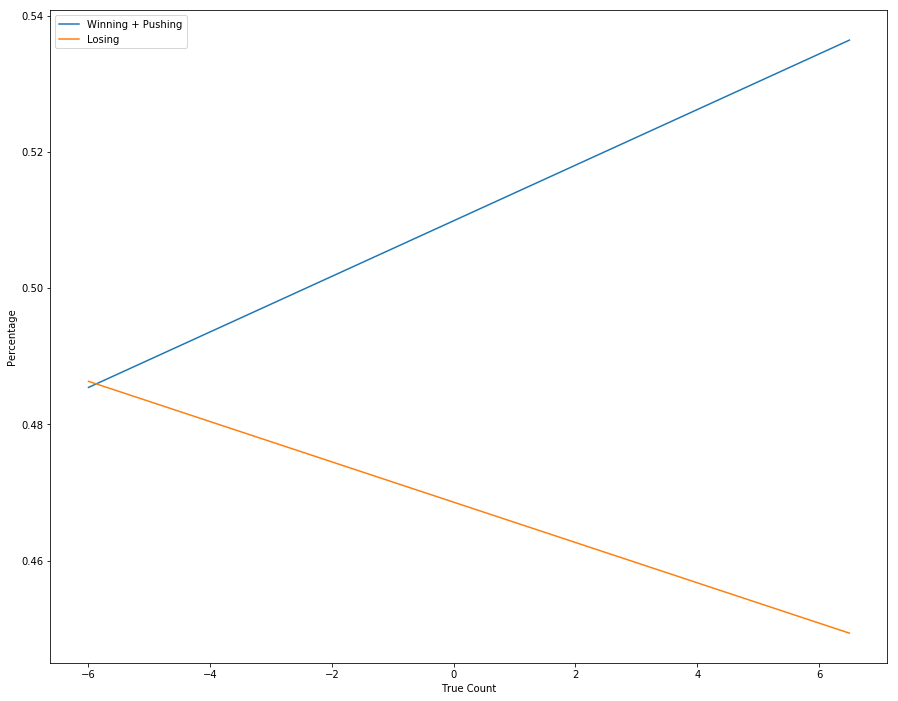

In [51]:
count = np.arange(-6,7,0.5)
plt.plot(count,intercept_wp + slope_wp*count);
plt.plot(count,intercept_l + slope_l*count);
plt.ylabel("Percentage");
plt.xlabel("True Count");
plt.legend(("Winning + Pushing","Losing"));

When true count is greater than -6, winning + pushing percentage is bigger than losing percentage.<br><br>
It means P(lose money) < P(not to lose money), therefore we can bet more than usual.<br><br>
But perhaps there might be some error in values so change bet size when the true count >= 1.5<br><br>

### Betting Systems

There are some famous betting systems such as<br><br>
#### a, 1-2-1....<br>
    After you win,next bet is going to be 2 units.
    Whenever you lose, go back to 1 unit.
    
    For instance,
    lose ⇨ win ⇨ lose ⇨ win ⇨ win ⇨ win ⇨ lose.....
    1uni⇨1unit⇨2units⇨1unit⇨2units⇨1unit⇨2units.....
#### b, 1-3-2-5<br>
    When you are winnig, chenge bet size.
    
    lose  win  win  lose  win  win  win  win  lose....
    1u    1u    3u    2u    1u    3u   2u    5u    1u
    
You can search other betting systems, if you are interested in.<br>

### Sumilated with following rules
* When true count is greater than equal to 1.5, 1-2-1... betting system.
* Buyin 200 dollers.
    If player lose 200 dollers in a day, stop the game at the day.
* Goal 100 dollers.
    If player made 100 dollers in a day, stop the game at the day.
* Play for 10 years(3600 days)

In [44]:
df_result = pd.read_csv("/Users/koheisuzuki/Desktop/Bob_Suzuki Brainstation_Final_Project/DDBJ_10years/DDBJ_10years_b200_g100_1.csv",index_col = 0)
df_result.head()

,Todays Amount,Todays Result,Total Amount
0,-200.0,0,-200.0
1,-200.0,0,-400.0
2,100.0,1,-300.0
3,112.5,1,-187.5
4,112.5,1,-75.0


### Check the winning percentage
When player buyin is 200 dollers and goal is 100 dollers, player needs 66.66% for win.<br>
It means 2399.8days / 10years(3600days).

In [45]:
len(df_result[df_result["Todays Result"] == 1])

2402

So this means player has made money for 10 years

This is the result of player

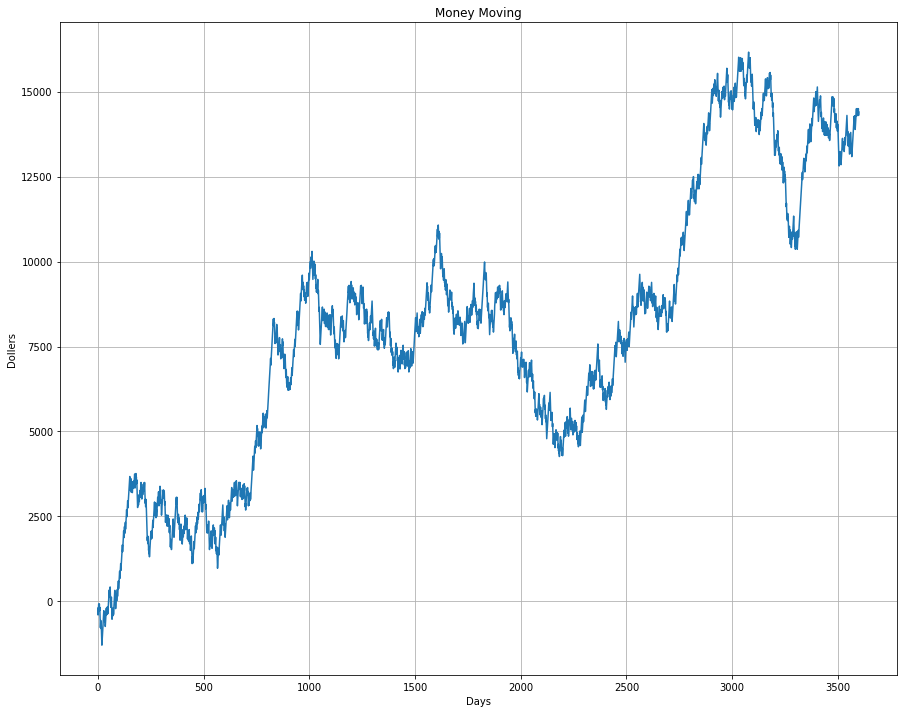

In [46]:
plt.plot(df_result.index, df_result["Total Amount"]);
plt.title("Money Moving");
plt.xlabel("Days");
plt.ylabel("Dollers");
plt.grid();

In [47]:
df_result.tail()

,Todays Amount,Todays Result,Total Amount
3595,-200.0,0,14300.0
3596,100.0,1,14400.0
3597,100.0,1,14500.0
3598,-200.0,0,14300.0
3599,100.0,1,14400.0


### Result

When use following rules,<br>
*Player's buyin is 200 dollers / day<br>
*Player's goal is 100 dollers / day<br>
*When the true count is greater then equal to 1.5, use 1-2-1 betting system.<br>


#### Reduction Rate
(14400 + 200 * 3600) / 200 * 3600 = 1.019444....<br>

So we can make money with Double Decks Black Jack at Parq Casino